# Feature engineering

In [1]:
import numpy as np
from numpy.typing import NDArray
import pickle
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

def onehot2cat(y:NDArray) -> NDArray:
    '''Convert y in one_hot to categorical'''
    return np.argmax(y, axis=1) 


def loadDataset(fn:str, toCat:bool=False) -> NDArray:
    '''load dataset'''
    with open(fn, 'rb') as f:
        data = pickle.load(f)
        
    X = data['X'] 
    if toCat: y = onehot2cat(data['Y'])
    else:     y = data['Y'] 
    
    return X, y


def saveSKLModel(fn:str, model) -> None:
    '''save SKLearn model as pickle'''
    with open(fn, 'wb') as f:
        pickle.dump(model, f)
        
#load dataset

fnt = 'wtdt-part.pickle'
X, y = loadDataset(fnt, toCat=True)
print(X.shape)
print(y.shape)

(14000, 787)
(14000,)


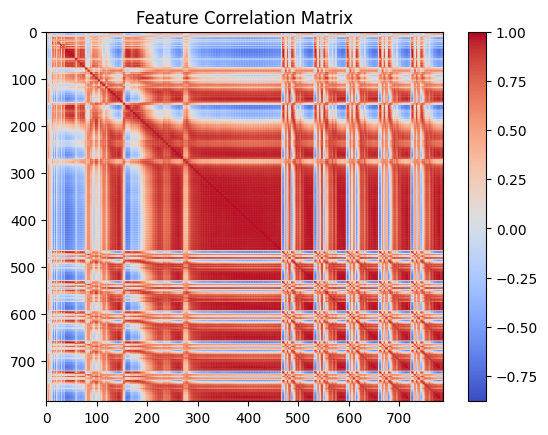

In [ ]:
corr_matrix = np.corrcoef(X.T)
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()  
plt.title("Feature Correlation Matrix")
plt.show()


In [8]:
import numpy as np
corr_matrix = np.corrcoef(X.T)
print("Min:", corr_matrix.min(), "Max:", corr_matrix.max(), "Mean:", corr_matrix.mean())


Min: -0.8780403783135924 Max: 1.0 Mean: 0.41511843653711533


In [ ]:
to_drop = []
for i in range(corr_matrix.shape[0]):
    for j in range(i+1, corr_matrix.shape[1]):
        if corr_matrix[i, j] == 1.0:
            to_drop.append(j)

X = X[:, list(set(range(X.shape[1])) - set(to_drop))]

print(X.shape)
print(y.shape)

(14000, 703)
(14000,)


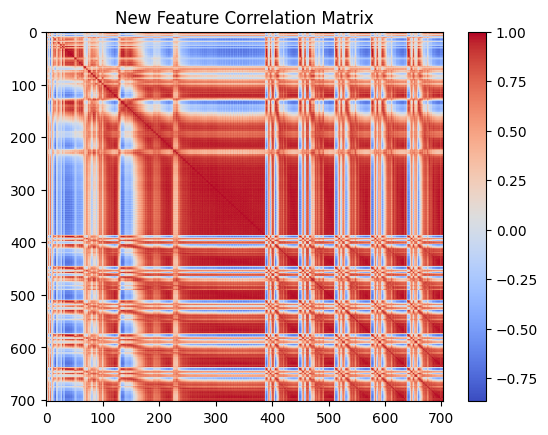

In [11]:
corr_matrix = np.corrcoef(X.T)
plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
plt.colorbar()  
plt.title("New Feature Correlation Matrix")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Define the model
model = LogisticRegression(max_iter=1000, solver='liblinear')

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l2'], 
    'solver': ['liblinear'], 
    'max_iter': [10000],
    'tol': [1e-4, 1e-3, 1e-2], 
    'fit_intercept': [True, False], 
    'class_weight': [None, 'balanced'],
    'multi_class': ['ovr', 'multinomial']
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation accuracy: {:.4f}".format(grid_search.best_score_))

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.4f}".format(accuracy))


Accuracy: 0.9910714285714286
